In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
#Load the dataset
df = pd.read_csv('C:/.../model_df.csv')

In [3]:
#Label Encoding
label_encoder_success = LabelEncoder()
label_encoder_weekday = LabelEncoder()
label_encoder_PSP = LabelEncoder()
label_encoder_3D_secured = LabelEncoder()
label_encoder_card = LabelEncoder()
label_encoder_unique_transaction = LabelEncoder()

df['success_encoded'] = label_encoder_success.fit_transform(df['success'])
df['weekday_encoded'] = label_encoder_weekday.fit_transform(df['weekday'])
df['PSP_encoded'] = label_encoder_PSP.fit_transform(df['PSP'])
df['3D_secured_encoded'] = label_encoder_3D_secured.fit_transform(df['3D_secured'])
df['card_encoded'] = label_encoder_card.fit_transform(df['card'])
df['unique_transaction_encoded'] = label_encoder_unique_transaction.fit_transform(df['unique_transaction'])

In [4]:
#Significant independent variables according to the Chi-square results 
X = df.loc[:,['weekday_encoded', 'PSP_encoded', '3D_secured_encoded', 'card_encoded', 'unique_transaction_encoded', 'amount']]
y = df['success_encoded']

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Define the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size at each iteration
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting each base estimator
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Test the model with the best parameters
best_gb_clf = grid_search.best_estimator_
y_pred = best_gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Score: 0.8017015024355961
Test Accuracy: 0.798825987463934


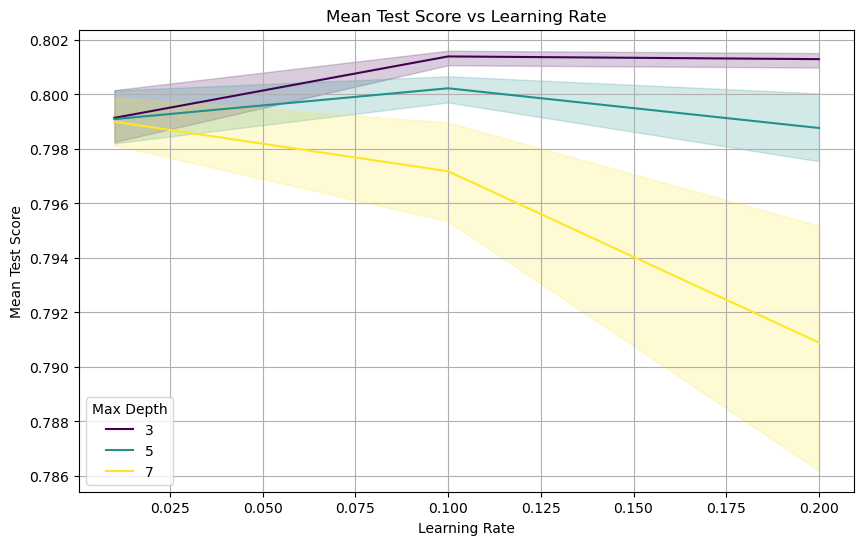

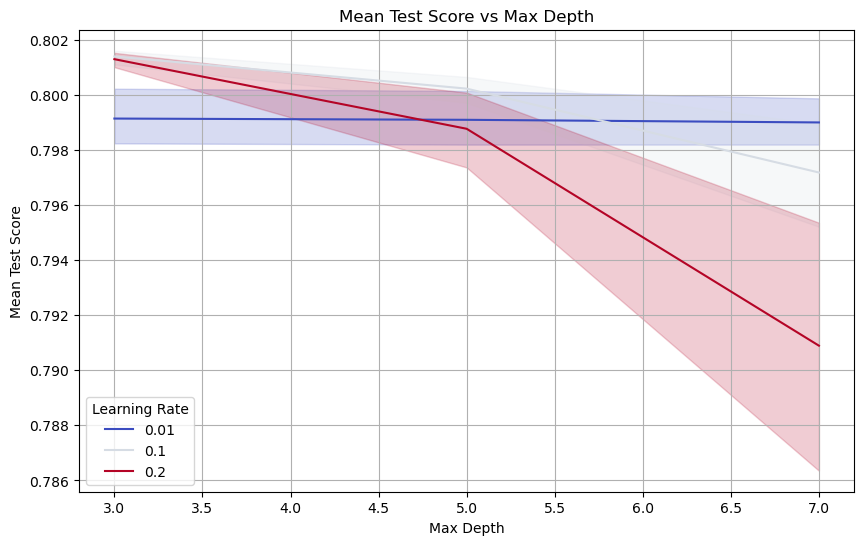

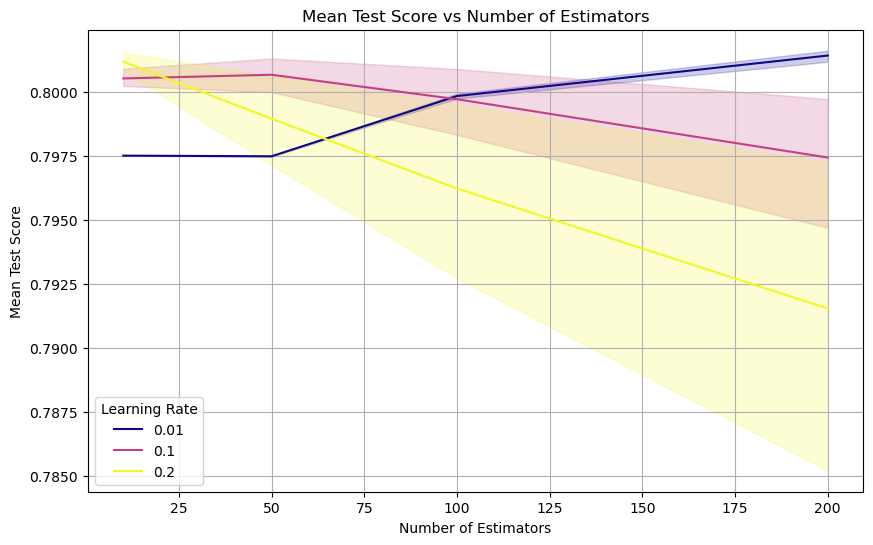

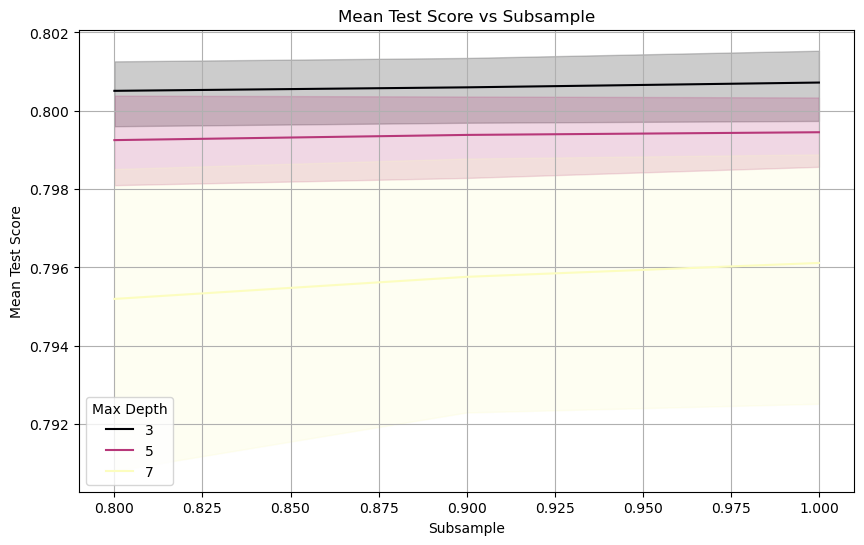

In [9]:
# Plot for learning_rate
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_learning_rate', y='mean_test_score', hue='param_max_depth', data=df_results, palette='viridis')
plt.title('Mean Test Score vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Test Score')
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()

# Plot for max_depth
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_max_depth', y='mean_test_score', hue='param_learning_rate', data=df_results, palette='coolwarm')
plt.title('Mean Test Score vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.legend(title='Learning Rate')
plt.grid(True)
plt.show()

# Plot for n_estimators
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_estimators', y='mean_test_score', hue='param_learning_rate', data=df_results, palette='plasma')
plt.title('Mean Test Score vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.legend(title='Learning Rate')
plt.grid(True)
plt.show()

# Plot for subsample
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_subsample', y='mean_test_score', hue='param_max_depth', data=df_results, palette='magma')
plt.title('Mean Test Score vs Subsample')
plt.xlabel('Subsample')
plt.ylabel('Mean Test Score')
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()
